In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [3]:
x_train.shape

(60000, 28, 28)

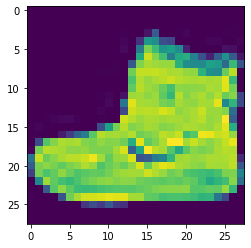

In [4]:
plt.imshow(x_train[0]);

# PreProcessing Data

Let's change the labels to categorical (it is not necessary, but it is good to explore it). 

## Labels

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

The labels are literally categories of numbers, so we will translate them to be "one hot encoded":

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_test.shape

(10000, 10)

In [10]:
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape

(60000, 10)

In [11]:
# verifing one sample label
print(y_train[0])
print(y_cat_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Processing X Data

We should normalize the X data

In [12]:
x_train.max()

255

In [13]:
x_train.min()

0

In [14]:
x_train = x_train/255
x_test = x_test/255

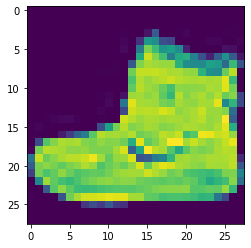

In [15]:
plt.imshow(x_train[0]);

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

For to use it with CNN, we need to add one more dimension to show we're dealing with 1 RGB channel 
- The images are in black and white, only showing values from 0-255 on a single channel, an color image would have 3 dimensions.

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

Reshaping to include channel dimension (in this case, 1 channel)

In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [19]:
# batch_size, widht, height, color_channels
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000,28,28,1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(
    Conv2D(
        filters=32,
        kernel_size=(4, 4),
        input_shape=(28, 28, 1),
        activation='relu',
    ))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES AND SOFTMAX ==> MULTI CLASS
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

## Train the Model

Let's add a callback, "EarlyStopping". This one of the techinics to prevent overfitting.


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
history = model.fit(x_train,
                    y_cat_train,
                    epochs=10,
                    validation_split=0.1,
                    callbacks=[early_stop])

Epoch 1/10
1688/1688 [==============================] - 36s 3ms/step - loss: 0.4211 - accuracy: 0.8499 - val_loss: 0.3428 - val_accuracy: 0.8755
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2890 - accuracy: 0.8956 - val_loss: 0.2920 - val_accuracy: 0.8933
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2417 - accuracy: 0.9108 - val_loss: 0.2867 - val_accuracy: 0.8958
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2065 - accuracy: 0.9234 - val_loss: 0.2604 - val_accuracy: 0.9075
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1813 - accuracy: 0.9326 - val_loss: 0.2751 - val_accuracy: 0.9022
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1566 - accuracy: 0.9412 - val_loss: 0.2444 - val_accuracy: 0.9152
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1338 - accuracy: 0.9501 - val_loss: 0.2563 - val_accuracy

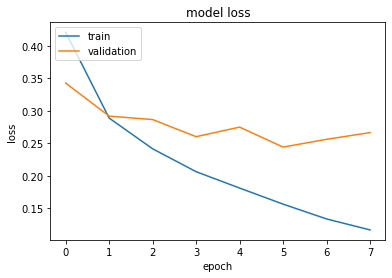

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

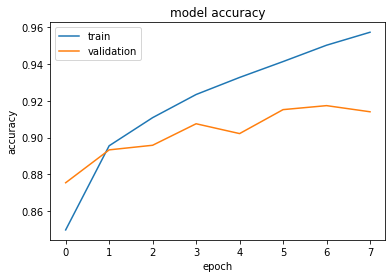

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate the Model

In [35]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.28008365631103516, 0.9100000262260437]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
predictions = np.argmax(model.predict(x_test), axis=-1)
predictions.shape

(10000,)

In [38]:
y_cat_test.shape

(10000, 10)

In [39]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [40]:
predictions[0]

9

In [41]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.82      0.89      0.85      1000
           3       0.93      0.92      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.71      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.95      0.99      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [43]:
confusion_matrix(y_test,predictions)

array([[830,   2,  27,  13,   7,   1, 106,   0,  14,   0],
       [  0, 986,   0,   7,   5,   0,   0,   0,   2,   0],
       [ 11,   0, 891,   6,  52,   0,  37,   0,   3,   0],
       [ 11,   5,  16, 915,  16,   0,  28,   0,   9,   0],
       [  2,   2,  70,  20, 877,   0,  29,   0,   0,   0],
       [  0,   0,   0,   0,   0, 981,   0,   7,   4,   8],
       [ 85,   0,  87,  20,  81,   0, 714,   0,  13,   0],
       [  0,   0,   0,   0,   0,  12,   0, 946,   2,  40],
       [  1,   3,   2,   2,   3,   1,   0,   1, 987,   0],
       [  0,   0,   0,   0,   0,   5,   0,  20,   2, 973]])

In [44]:
import seaborn as sns

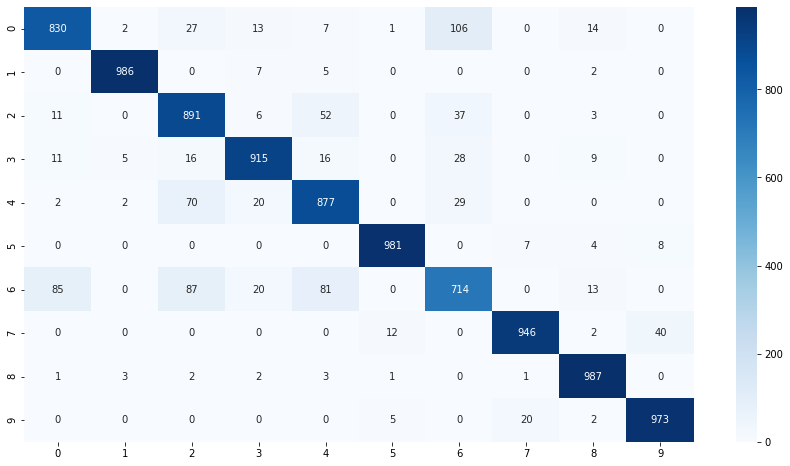

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions), cmap='Blues', annot=True, fmt='g');